## Описание данных
Датасет содержит данные о покупках в онлайн магазине электроники и бытовой техники                                             
Столбцы датасета:
- **event_time** - время покупки
- **order_id** - id заказа
- **product_id** - id товара
- **category_id** - id категории товара
- **category_code** - код категории товара
- **brand** - бренд (компания)
- **price** - цена товара
- **user_id** - id пользователя

## Задачи:
- провести предобработку данных и очистить их
- расчитать retention rate по месяцам

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и предобработка данных

In [2]:
# загружаем данные
df = pd.read_csv('C:/Users/SweetHome/Downloads/kz.csv')
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [3]:
# смотритрим, что содержится в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [4]:
# изменяем формат на дату
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   order_id       int64              
 2   product_id     int64              
 3   category_id    float64            
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(2)
memory usage: 160.7+ MB


In [5]:
# смотрим размер
df.shape

(2633521, 8)

In [6]:
# смотрим количество уникальных значений
df.nunique()

event_time       1316174
order_id         1435266
product_id         25113
category_id          900
category_code        510
brand              23021
price               2802
user_id            98262
dtype: int64

In [7]:
# считаем количество дупликатов т.к. их видно в самом начале датасета
df.duplicated().sum()

675

In [8]:
# убираем дупликаты т.к. они не нужны нам для подсчета retention
df = df.drop_duplicates()
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18
6,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18


In [9]:
# смотрим количество null значений
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431953
category_code     612053
brand             505965
price             431953
user_id          2069351
dtype: int64

In [10]:
# удаляем null значения только в колонке user_id т.к. для подсчета retention могут использоваться записи с null значениями в других колонках
df = df.dropna(subset=['user_id'])
df.isnull().sum()

event_time            0
order_id              0
product_id            0
category_id           0
category_code    129221
brand             27184
price                 0
user_id               0
dtype: int64

In [11]:
# смотрим описание данных и видим, что у нас есть данные за 1970 и 2020 года
df.describe(include='all')

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
count,563495,5.634950e+05,5.634950e+05,5.634950e+05,434274,536311,563495.000000,5.634950e+05
unique,NaN,NaN,NaN,NaN,123,868,NaN,NaN
top,NaN,NaN,NaN,NaN,electronics.smartphone,samsung,NaN,NaN
freq,NaN,NaN,NaN,NaN,102596,96123,NaN,NaN
mean,2020-06-25 16:58:16.100529920+00:00,2.370562e+18,1.695697e+18,2.272918e+18,NaN,NaN,208.326466,1.515916e+18
min,1970-01-01 00:33:40+00:00,2.294360e+18,1.515966e+18,2.268105e+18,NaN,NaN,0.000000,1.515916e+18
25%,2020-06-26 13:21:11+00:00,2.353295e+18,1.515966e+18,2.268105e+18,NaN,NaN,23.130000,1.515916e+18
50%,2020-08-16 07:40:06+00:00,2.376896e+18,1.515966e+18,2.268105e+18,NaN,NaN,87.940000,1.515916e+18
75%,2020-10-09 14:05:14+00:00,2.388441e+18,1.515966e+18,2.268105e+18,NaN,NaN,277.750000,1.515916e+18
max,2020-11-21 10:10:30+00:00,2.388441e+18,2.388434e+18,2.374499e+18,NaN,NaN,18328.680000,1.515916e+18


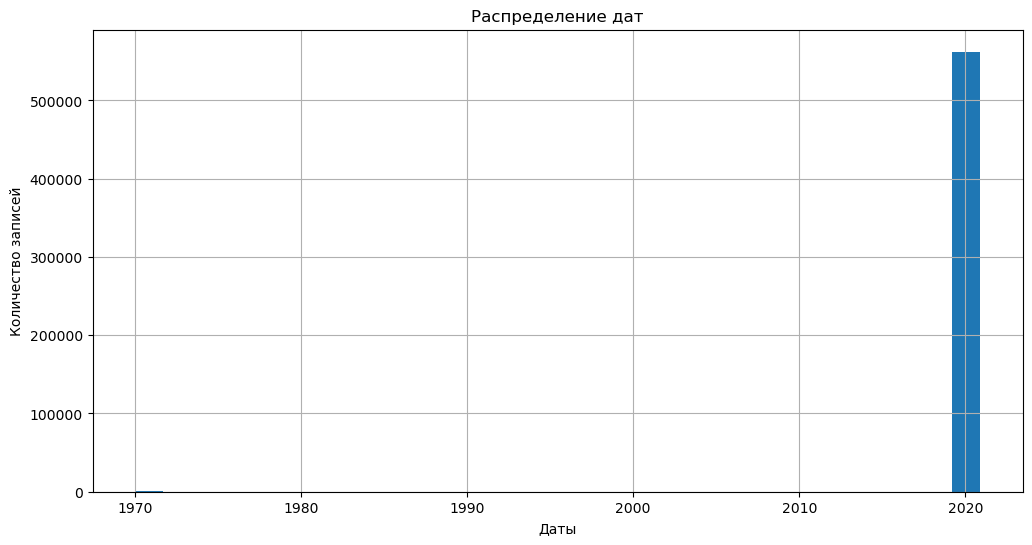

In [12]:
# строим график распределения дат, чтобы понять какие у нас есть значения по годам
plt.figure(figsize=(12, 6))
df['event_time'].hist(bins=30)
plt.title('Распределение дат')
plt.xlabel('Даты')
plt.ylabel('Количество записей')
plt.show()

In [13]:
# из графика видно, что у нас в данных преобладает 2020 год, поэтому берем данные только за этот год
df = df[df['event_time'].dt.year == 2020]
df.describe(include='all')

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
count,562188,5.621880e+05,5.621880e+05,5.621880e+05,433413,535065,562188.000000,5.621880e+05
unique,NaN,NaN,NaN,NaN,123,866,NaN,NaN
top,NaN,NaN,NaN,NaN,electronics.smartphone,samsung,NaN,NaN
freq,NaN,NaN,NaN,NaN,102453,95994,NaN,NaN
mean,2020-08-07 13:46:52.072524032+00:00,2.370619e+18,1.695646e+18,2.272921e+18,NaN,NaN,208.492588,1.515916e+18
min,2020-01-05 04:01:46+00:00,2.294360e+18,1.515966e+18,2.268105e+18,NaN,NaN,0.000000,1.515916e+18
25%,2020-06-28 01:16:59.500000+00:00,2.353710e+18,1.515966e+18,2.268105e+18,NaN,NaN,23.130000,1.515916e+18
50%,2020-08-16 11:13:48+00:00,2.377054e+18,1.515966e+18,2.268105e+18,NaN,NaN,87.940000,1.515916e+18
75%,2020-10-09 19:05:46+00:00,2.388441e+18,1.515966e+18,2.268105e+18,NaN,NaN,277.750000,1.515916e+18
max,2020-11-21 10:10:30+00:00,2.388441e+18,2.388434e+18,2.374499e+18,NaN,NaN,18328.680000,1.515916e+18


## Анализ данных

In [14]:
# убираем значение временнной зоны и извлекаем месяц покупки
df['purchase_month'] = df['event_time'].dt.tz_localize(None).dt.to_period('M')
df['purchase_month'].unique()

<PeriodArray>
['2020-04', '2020-05', '2020-06', '2020-07', '2020-01', '2020-02', '2020-03',
 '2020-08', '2020-09', '2020-10', '2020-11']
Length: 11, dtype: period[M]

In [15]:
# находим первый месяц покупки для каждого пользователя
df['first_purchase_month'] = df.groupby('user_id')['purchase_month'].transform('min')
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,purchase_month,first_purchase_month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04,2020-04
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04,2020-04
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04,2020-04
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04,2020-04
6,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04,2020-03


In [16]:
# вычисляем разницу в месяцах между покупкой и первой покупкой
df['months_since_first_purchase'] = (df['purchase_month'].astype('int64') - 
                                    df['first_purchase_month'].astype('int64'))
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,purchase_month,first_purchase_month,months_since_first_purchase
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04,2020-04,0
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04,2020-04,0
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04,2020-04,0
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18,2020-04,2020-04,0
6,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18,2020-04,2020-03,1


In [17]:
# создаем таблицу для расчета retention, где в качестве значений количество пользователей
cohorts = df.groupby(['first_purchase_month', 'months_since_first_purchase'])['user_id'].nunique().unstack()
cohorts.head()

months_since_first_purchase,0,1,2,3,4,5,6,7,8,9,10
first_purchase_month,,,,,,,,,,,
2020-01,1876.0,649.0,594.0,483.0,811.0,804.0,718.0,780.0,685.0,443.0,319.0
2020-02,1673.0,534.0,399.0,688.0,683.0,637.0,671.0,587.0,342.0,289.0,NaN
2020-03,1530.0,387.0,653.0,648.0,565.0,610.0,546.0,321.0,211.0,NaN,NaN
2020-04,4337.0,1132.0,729.0,1011.0,997.0,716.0,492.0,277.0,NaN,NaN,NaN
2020-05,14573.0,2138.0,2687.0,2630.0,1758.0,1123.0,610.0,NaN,NaN,NaN,NaN


In [18]:
# делим каждое значение в строке на значение из столбца 0 и тем самым рассчитываем retention rate
retention = cohorts.divide(cohorts[0], axis=0)
retention.head()

months_since_first_purchase,0,1,2,3,4,5,6,7,8,9,10
first_purchase_month,,,,,,,,,,,
2020-01,1.0,0.345949,0.316631,0.257463,0.432303,0.428571,0.382729,0.415778,0.365139,0.236141,0.170043
2020-02,1.0,0.319187,0.238494,0.411237,0.408249,0.380753,0.401076,0.350867,0.204423,0.172744,NaN
2020-03,1.0,0.252941,0.426797,0.423529,0.369281,0.398693,0.356863,0.209804,0.137908,NaN,NaN
2020-04,1.0,0.261010,0.168089,0.233110,0.229882,0.165091,0.113442,0.063869,NaN,NaN,NaN
2020-05,1.0,0.146710,0.184382,0.180471,0.120634,0.077060,0.041858,NaN,NaN,NaN,NaN


In [19]:
# вставляем колонку с размером когорты в начало
cohort_sizes = df.groupby('first_purchase_month')['user_id'].nunique()
retention.insert(0, 'cohort_size', cohort_sizes)
retention

months_since_first_purchase,cohort_size,0,1,2,3,4,5,6,7,8,9,10
first_purchase_month,,,,,,,,,,,,
2020-01,1876,1.0,0.345949,0.316631,0.257463,0.432303,0.428571,0.382729,0.415778,0.365139,0.236141,0.170043
2020-02,1673,1.0,0.319187,0.238494,0.411237,0.408249,0.380753,0.401076,0.350867,0.204423,0.172744,NaN
2020-03,1530,1.0,0.252941,0.426797,0.423529,0.369281,0.398693,0.356863,0.209804,0.137908,NaN,NaN
2020-04,4337,1.0,0.261010,0.168089,0.233110,0.229882,0.165091,0.113442,0.063869,NaN,NaN,NaN
2020-05,14573,1.0,0.146710,0.184382,0.180471,0.120634,0.077060,0.041858,NaN,NaN,NaN,NaN
2020-06,9373,1.0,0.234503,0.201323,0.134535,0.087379,0.050251,NaN,NaN,NaN,NaN,NaN
2020-07,23336,1.0,0.235987,0.108588,0.067492,0.033510,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,23482,1.0,0.148497,0.088238,0.047909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,8839,1.0,0.202625,0.084059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Визуализация

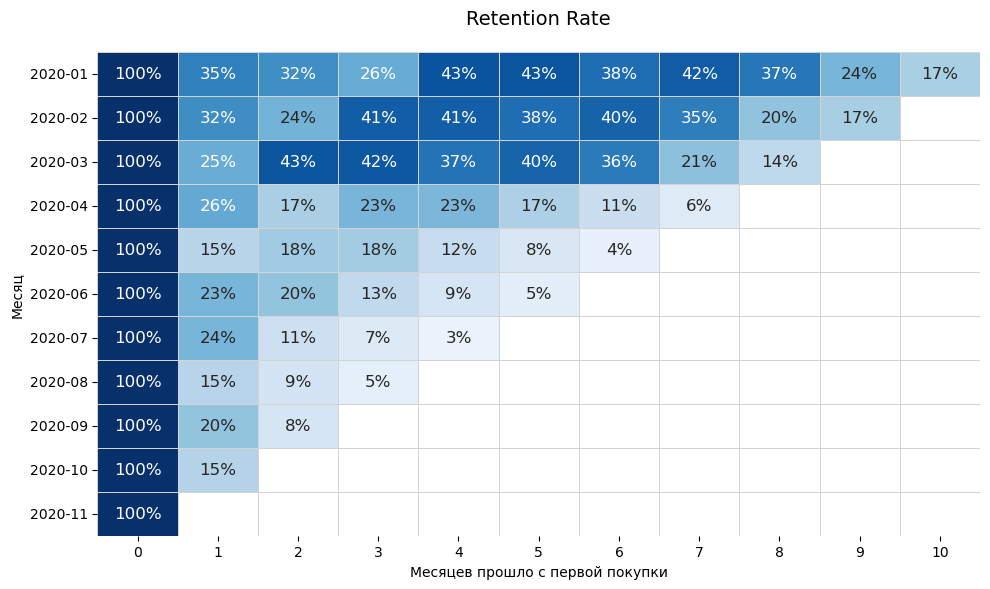

In [20]:
# подготавливаем данные (оставляем только месяцы)
retention_data = retention[[col for col in retention.columns if isinstance(col, int)]]

# создаем heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    retention_data,
    annot=True,             # показывать значения в ячейках
    fmt='.0%',              # формат процентов
    cmap='Blues',           # синяя цветовая схема
    vmin=0,                 # минимум для шкалы цветов
    vmax=0.5,               # максимум для шкалы (50%)
    cbar=False,             # убираем цветовую шкалу
    linewidths=0.5,         # тонкие границы
    linecolor='lightgray',  # цвет границ
    annot_kws={'size': 12}  # размер шрифта значений
)

# добавляем подписи
plt.title('Retention Rate', pad=20, fontsize=14)
plt.xlabel('Месяцев прошло с первой покупки')
plt.ylabel('Месяц')

plt.tight_layout()
plt.show()

## Выводы по данным

1. У большинства когорт retention за первый месяц ниже 30% и этот показатель со временем только понижается. Для повышения retention в первый месяц можно предлагать клиентам бонусы за отзыв или оценку
2. Больше всего новых клиентов за месяц было привлечено в период с мая по август, но показатели retention у этих когорты были меньше, чем предидущих когорт. Это может быть связано с измнением рекламной компании, которая больший приоритет стала отдавать привлечению новых пользователей и меньше времени уделять их удержанию. В этом случае надо сохранять балланс между качеством (удержанием) и количеством клиентов, для новых когорт рекомендуется наладить постпродажное взаимодействие с клиентом (отправлять новые предложения по товарам, спрашивать почему перестали пользоваться нашим сервисом, бонусная программа и т.д.)
3. Большое число клиентов, покупавших товары зимой и весной, вернулись летом, это может быть связано с успешной рекламной компанией или сезонным предложением, в любом случае все было сделано правильно и процент удержания клиентов спустя 6 месяцев после покупки были даже выше, чем спустя 1 месяц после покупки
4. С сентября по ноябрь количество новых клиентов за месяц начало резко падать, также уменьшился и процент удержания по сравнению, например, с январем возможно это связанно с сезонностью или из-за большого числа клиентов летом ухудшилось качество обслуживания или из-за изменения рекламной компании, в любом случае для повышения retention можно проводить опросы по оценке качества, вводить прогрыммы лояьности, делать персональные предложения и т.д.